In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

np.set_printoptions(threshold=10, precision=6)

# K-Means Clustering 

### Generating Bivariate Data

In [3]:
def generate_bivariate_data(size, classes=2, angle=None, sep=1, noise=1.5):
    x_c = np.linspace(-sep, sep, classes) * classes
    y_c = np.random.permutation(x_c)
    X = np.concatenate([np.random.normal(loc=(x_c[i], y_c[i]), 
                                         scale=noise, 
                                         size=(size // classes, 2)) for i in range(classes)], axis=0)
    left = size - X.shape[0]
    if left > 0:
        X = np.r_[X, np.random.normal(loc=(x_c[0], y_c[0]), scale=noise,size=(left, 2))]
    
    y = np.concatenate([np.zeros(size // classes) + i for i in range(classes)], axis=0)
    angle = angle if angle else np.random.randint(0, 181)
    theta = np.pi / 180 * angle
    R = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
    X = X @ R
    return X, y

In [4]:
X, y = generate_bivariate_data(400, classes=8, sep=1.5)

print("X shape : ", X.shape)

X shape :  (400, 2)


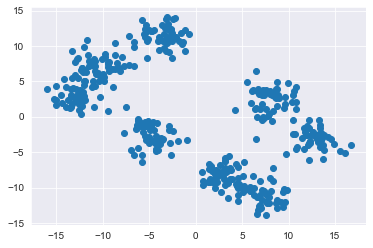

In [5]:
plt.scatter(X[:, 0], X[:, 1])

### K-Means Clustering Model

In [23]:
class KMeans:
    def __init__(self, n_clusters):
        self.__n_clusters = n_clusters
        self.clusters = None
        self.cluster_centers = None
        self.loss_per_epochs = []
    
    def fit(self, X, verbose=True, save_figs=False):
        """
        executes K-Means clusters algorithm
        X : unlabeled data
        verbose : takes values `False`(silent), `True`(show loss in each epoch).
        save_figs : generates scatter plots of clusters formed in each epochs ans saves as jpeg
        """
        if not np.sum(self.cluster_centers): 
            self.cluster_centers = np.random.permutation(X)[:self.__n_clusters]
        epochs = 0
        while True:
            self.clusters = [np.array([]) for _ in range(self.__n_clusters)]
            for x in X:
                distances = np.sum((x - self.cluster_centers) ** 2, axis=1) ** 0.5
                c = np.argsort(distances)[0]
                if self.clusters[c].size == 0:
                    self.clusters[c] = x[np.newaxis, :]
                else:
                    self.clusters[c] = np.vstack([self.clusters[c], x])
            next_cluster_centers = np.array([cluster.mean(axis=0) for cluster in self.clusters])
            J = self.evaluate()
            self.loss_per_epochs.append(J)
            epochs += 1   
            if verbose:
                print(f'Epoch {epochs} :\n{X.shape[0]}/{X.shape[0]} [==============] : loss = {J:.6f}')
            if save_figs:
                self.plot_clusters()
                plt.savefig(f'epoch{epochs}.jpeg', dpi=100)
                plt.close()
            if (next_cluster_centers == self.cluster_centers).all():
                break
            self.cluster_centers = next_cluster_centers
            
        print("\nConvergence at Epoch:", epochs)
        
    def evaluate(self):
        J = 0
        for center, cluster in zip(self.cluster_centers, self.clusters):
            J += 0.5 * np.mean(np.sum((cluster - center) ** 2, axis=1))
        return J / self.__n_clusters
  
    def plot_clusters(self, plot_centers=True, figsize=(7,7), ec='w', s=100, marker='X', save_figs=False):
        plt.figure(figsize=figsize)
        for center, cluster in zip(self.cluster_centers, self.clusters):
            plt.scatter(cluster[:, 0], cluster[:, 1], ec=ec, s=s)
            if plot_centers:
                plt.scatter(center[0], center[1], c='k', ec='w', s=s * 2, marker=marker)
        

### Training

In [24]:
model = KMeans(n_clusters=3)

In [25]:
model.fit(X)

Epoch 1 :
400/400 [==============] : loss = 42.833322
Epoch 2 :
400/400 [==============] : loss = 18.899245
Epoch 3 :
400/400 [==============] : loss = 17.471620
Epoch 4 :
400/400 [==============] : loss = 14.539825
Epoch 5 :
400/400 [==============] : loss = 13.662130
Epoch 6 :
400/400 [==============] : loss = 13.727403
Epoch 7 :
400/400 [==============] : loss = 13.441405
Epoch 8 :
400/400 [==============] : loss = 13.434321

Convergence at Epoch: 8


Text(0.5, 1.0, 'Training Loss')

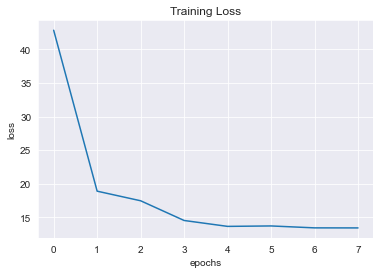

In [26]:
plt.plot(model.loss_per_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training Loss')

In [27]:
model.evaluate()

13.434321190904903

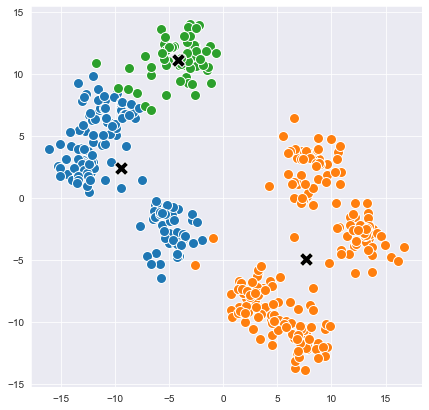

In [28]:
model.plot_clusters()

In [29]:
model.cluster_centers

array([[-9.456681,  2.364735],
       [ 7.653323, -4.913061],
       [-4.203495, 11.096054]])

## Choosing the value of K


Model 1 :	Value of K = 2
Convergence at Epoch: 7
Final Cost = 21.98539501732354

Model 2 :	Value of K = 3
Convergence at Epoch: 6
Final Cost = 13.434321190904903

Model 3 :	Value of K = 4
Convergence at Epoch: 4
Final Cost = 7.981765904104317

Model 4 :	Value of K = 5
Convergence at Epoch: 7
Final Cost = 6.028340905524678

Model 5 :	Value of K = 6
Convergence at Epoch: 5
Final Cost = 5.053265354955177

Model 6 :	Value of K = 7
Convergence at Epoch: 11
Final Cost = 3.721818652681601

Model 7 :	Value of K = 8
Convergence at Epoch: 8
Final Cost = 2.2912204009371475

Model 8 :	Value of K = 9
Convergence at Epoch: 19
Final Cost = 2.1465934990995716

Model 9 :	Value of K = 10
Convergence at Epoch: 6
Final Cost = 2.1598759987607226

Model 10 :	Value of K = 11
Convergence at Epoch: 5
Final Cost = 1.6665106021881904

Model 11 :	Value of K = 12
Convergence at Epoch: 9
Final Cost = 1.4235017070453297

Model 12 :	Value of K = 13
Convergence at Epoch: 7
Final Cost = 1.3768198170925174

Model 13 :	

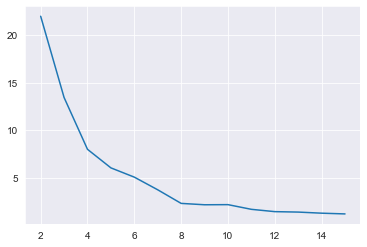

In [30]:
model_costs = []
K_values = range(2, 16)
for k in K_values:
    print(f"\nModel {k - 1} :\tValue of K = {k}", end="")
    model = KMeans(n_clusters=k)
    model.fit(X, verbose=False)
    model_costs.append(model.evaluate())
    print(f"Final Cost = {model_costs[-1]}")

plt.plot(K_values, model_costs)

### Training Model with K = 6

In [31]:
model = KMeans(n_clusters=6)

In [32]:
model.fit(X, save_figs=True)

Epoch 1 :
400/400 [==============] : loss = 29.426507
Epoch 2 :
400/400 [==============] : loss = 8.926150
Epoch 3 :
400/400 [==============] : loss = 6.401474
Epoch 4 :
400/400 [==============] : loss = 4.729613
Epoch 5 :
400/400 [==============] : loss = 4.362065
Epoch 6 :
400/400 [==============] : loss = 3.512193
Epoch 7 :
400/400 [==============] : loss = 3.175970
Epoch 8 :
400/400 [==============] : loss = 3.174923

Convergence at Epoch: 8


Text(0.5, 1.0, 'Training Loss')

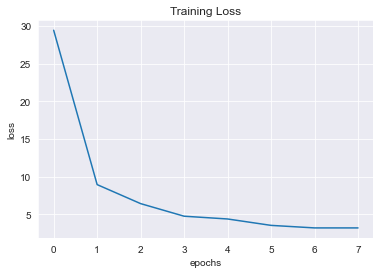

In [33]:
plt.plot(model.loss_per_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training Loss')

In [34]:
model.evaluate()

3.1749230373395068

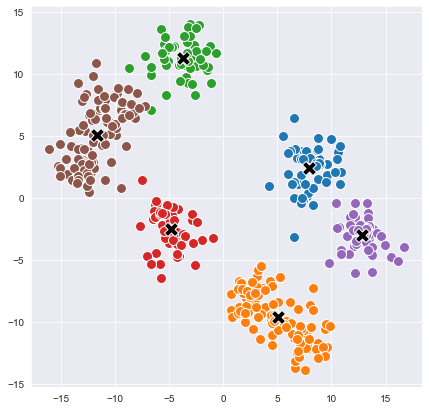

In [35]:
model.plot_clusters()

In [36]:
model.cluster_centers

array([[  7.975682,   2.377996],
       [  5.063028,  -9.633342],
       [ -3.743464,  11.305713],
       [ -4.850925,  -2.539677],
       [ 12.830433,  -3.027014],
       [-11.65297 ,   5.090211]])